In [1]:
from cobra.io import load_model, load_json_model

In [2]:
# Contains the main steps of the BayesOpt
%run BayesOpt_MOBO_II.ipynb

In [ ]:
# Plotting functions to be used across notebooks
%run Figure2ABC_Plotting.ipynb

In [ ]:
# imports for .py version
#from BayesOpt_MOBO_II import *
#from Figure2 import *
#from HelperFunctions_MOBO_II import *

# Models & Media

## Load & Define

### Models

In [3]:
# load iML1515
model_iML1515 = load_model("iML1515")
medium_iML1515 = model_iML1515.medium
print(model_iML1515)

iML1515


### Media

In [5]:
"""
Cost of EX_nh4_e should be 3.6748, not 10.099587. There was an error in my database
"""
# true M9
medium_M9 = {
    'EX_nh4_e': 9.3475, # Ammonia
    'EX_ca2_e': 0.05, # Calcium
    'EX_glc__D_e': 10, # Carbon - Glucose
    'EX_cl_e': 13.6755, # Chloride - sum of NaCl, NH4Cl and CaCl2
    'EX_mg2_e': 1, # Magnesium
    'EX_pi_e': 34.90, # Phosphate - sum of KH2PO4 and Na2HPO4
    'EX_k_e': 11.02, # Potassium
    'EX_na1_e': 0, #52.038, # Sodium - sum of NaCl and Na2HPO4
    'EX_so4_e': 1, # Sulfate
    'EX_co2_e': 0.0, # Carbon Dioxide - provided by the "atmosphere"
    'EX_h_e': 0.0, # Hydrogen (from CO2 dissolving in water?)
    'EX_h2o_e': 0.0, # Water - solvent
    'EX_o2_e': 20.0, # Oxygen - provided by the "atmosphere"
}
bounds_M9 = {
    'EX_nh4_e': (0.0, 10),
    'EX_ca2_e': (0.0, 10),
    'EX_glc__D_e': (1.0, 10),
    'EX_cl_e': (0.0, 20),
    'EX_mg2_e': (0.0, 10),
    'EX_pi_e': (0.0, 50),
    'EX_k_e': (0.0, 20),
    'EX_na1_e': (0.0, 0.0), # fix - can be set to 0
    'EX_so4_e': (0.0, 10),
    'EX_co2_e': (0.0, 0.0), # 
    'EX_h2_e': (0.0, 0.0), # 
    'EX_h2o_e': (0.0, 0.0), # 
    'EX_o2_e': (0, 20), # fix - can't be set to 10 or lower
}
# costs are in £/mol
costs_M9 = {
    'EX_nh4_e': 3.6748, # Ammonia - as NH4Cl - approximate (several sources and "side-effect"
    'EX_ca2_e': 18.08223, # Calcium - as CaCl2·2H2O
    'EX_glc__D_e': 7.7647236, # Glucose
    'EX_cl_e': 3.03888, # Chlorid - as NaCl, NH4Cl, CaCl2 - approximate price from NaCl
    'EX_mg2_e': 19.1022, # Magnesium - as MgSO4·7H2O - approximate bc. half of 38.2044
    'EX_pi_e': 23.4234, # Phosphate - approximate (several sources)
    'EX_k_e': 20.82177, # Potassium - as KCl - approximate (several sources and "side-effect"
    'EX_na1_e': 0.0, # Sodium - as NaCl, Na2HPO4
    'EX_so4_e': 19.1022, # Sulfate - as MgSO4·7H2O - approximate bc. half of 38.2044
    'EX_o2_e': 0.0, # oxygen - no costs    
}

# M9 with essential trace metals
medium_iJO1366_reduced = {
    'EX_pi_e': 34.90, # in M9
    'EX_mn2_e': 0.001, # - required?; drops at 0.0001
    'EX_fe2_e': 0.1, # - required?; drops at 0.01
    'EX_glc__D_e': 10.0, # in M9
    'EX_zn2_e': 0.001, # - required?; drops at 0.0001
    'EX_mg2_e': 1.0, # in M9 
    'EX_ca2_e': 0.05, # in M9
    'EX_ni2_e': 0.001, # - required?; drops at 0.0001
    'EX_cu2_e': 0.001, # - required?; drops at 0.0001
    'EX_cobalt2_e': 0.0001, # - required; drops at 0.00001 
    'EX_mobd_e': 0.0005, # - required?; drops at 0.000001
    'EX_so4_e': 1.0, # in M9
    'EX_nh4_e': 9.3475, # in M9
    'EX_k_e': 11.02, # in M9
    'EX_na1_e': 52.038, # in M9
    'EX_cl_e': 13.6755, # in M9
    'EX_o2_e': 20.0, # in M9 II - drops at 10
}
bounds_iJO1366_reduced = {
    'EX_pi_e': (0.0, 50),
    'EX_mn2_e': (0.001, 0.001), # fix "trace" 
    'EX_fe2_e': (0.1, 0.1), # fix "trace"
    'EX_glc__D_e': (1.0, 10),
    'EX_zn2_e': (0.001, 0.001), # fix "trace"
    'EX_mg2_e': (0.0, 10),
    'EX_ca2_e': (0.0, 10),
    'EX_ni2_e': (0.001, 0.001), # fix "trace"
    'EX_cu2_e': (0.001, 0.001), # fix "trace"
    'EX_cobalt2_e': (0.0001, 0.0001), # fix "trace"
    'EX_mobd_e': (0.0005, 0.0005), # fix "trace"
    'EX_so4_e': (0.0, 10),
    'EX_nh4_e': (0.0, 10),
    'EX_k_e': (0.0, 20),
    'EX_na1_e': (0.0, 100.0), # fix - can be set to 0
    'EX_cl_e': (0.0, 20),
    'EX_o2_e': (0, 20), # fix - can't be set to 10 or lower
}
# costs are in £/mol
costs_iJO1366_reduced = {
    'EX_pi_e': 23.4234, # Phosphate - approximate (several sources)
    'EX_mn2_e': 0.0, #33.25, # Manganese - MnCl2·4H20
    'EX_fe2_e': 0.0, #37.5, # IronII - as iron sulfate FeSO4·7H2O
    'EX_glc__D_e': 7.7647236, # Glucose
    'EX_zn2_e': 0.0, #28.3, # Zinc - as Zn(CH3CHOOH)·H2O
    'EX_mg2_e': 19.1022, # Magnesium - as MgSO4·7H2O - approximate bc. half of 38.2044
    'EX_ca2_e': 18.08223, # Calcium - as CaCl2·2H2O
    'EX_ni2_e': 0.0, #53.24, # Nickel - as NiCl2·6H2O
    'EX_cu2_e': 0.0, #31.37, # Copper - CuCl2·2H2O
    'EX_cobalt2_e': 0.0, #114.39, # Cobalt - as CoCl2·6H2O
    'EX_mobd_e': 0.0, #184.12, # Molybdenum - molybdate NaMoO4·2H2O
    'EX_so4_e': 19.1022, # Sulfate - as MgSO4·7H2O - approximate bc. half of 38.2044
    'EX_nh4_e': 3.6748, # Ammonia - as NH4Cl - approximate (several sources and "side-effect"
    'EX_k_e': 20.82177, # Potassium - as KCl - approximate (several sources and "side-effect"
    'EX_na1_e': 0.0, # Sodium - as NaCl, Na2HPO4
    'EX_cl_e': 3.03888, # Chlorid - as NaCl, NH4Cl, CaCl2 - approximate price from NaCl
    'EX_o2_e': 0.0, # oxygen - no costs
}


# Running the Optimisation(s)

## iML1515

In [12]:
# set n_iter and date to be used in all calls and names
date = "2025-07-03"
rounds = 1 # how often should the algorithm run
n_start = 50 # how many random media compositions to initialise the algorithm
n_iter = 80 # how many iterations per run
iterations = str(n_iter)
n_candidates = 15 # batch size

biomass_rxn_id = "BIOMASS_Ec_iML1515_core_75p37M"
AF_type = "qPAREGO"
#AF_type = "qNEHVI"

# set medium
medium = medium_iJO1366_reduced
bounds = bounds_iJO1366_reduced
costs = costs_iJO1366_reduced

model_iML1515.medium = medium

"""performance with chosen medium"""
solution = model_iML1515.optimize()
biomass_rxn = model_iML1515.reactions.get_by_id("BIOMASS_Ec_iML1515_core_75p37M")
# bounds of biomass reaction
biomass_rxn.bounds = (0.0, 0.85)
# setting the upper limit of oxygen to 20, reduces the maximum growth rate to 0.822
print("Biomass flux:\t", solution.fluxes["BIOMASS_Ec_iML1515_core_75p37M"])

Biomass flux:	 0.8217947382570283


### Growth-Cost

In [13]:
opt_objective = "growth-cost"

for r in range(rounds):
    runde = str(r+1)
    print("Round:\t", runde, " of ", rounds)
    results_iML1515_M9 = media_BayesOpt(
        model_iML1515,
        medium,
        bounds,
        costs,
        opt_objective,
        biomass_rxn_id,
        None,
        AF_type,
        n_start = n_start, 
        n_iter = n_iter,
        n_candidates = n_candidates,
        model_objective = combined_objective)
    
    # plot & save results
    basename = (date + "_BayesOpt_iML1515_" + opt_objective + "_" +
                AF_type + "_" + iterations + "it_round_" + runde)
    
    # store results in JSON file
    JSON_serialize_store_results(results_iML1515_M9, basename)

    # Figure 2A
    plot_growth_per_cost(
        results = results_iML1515_M9,
        figname = (basename + "_growth-per-cost.png")
    )

    # Figure 2B
    plot_pareto_batch_colour(
        results = results_iML1515_M9,
        figname = (basename + "_pareto_batch_colour.png"),
        MetModel = model_iML1515,
        initial_medium = medium,
        initial_costs = costs
    )
    
    # Figure 2C

Round:	 1  of  1


c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\so

Iteration:	 10


c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Iteration:	 20


c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Iteration:	 30


c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\so

Iteration:	 40


c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Iteration:	 50


c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\so

Iteration:	 60
Iteration:	 70


c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Iteration:	 80


NameError: name 'plot_growth_per_cost' is not defined

# Plotting

In [101]:
%run Figure2.ipynb

In [ ]:
# Figure 2A
plot_growth_per_cost(
    results = results_iML1515_M9,
    figname = (basename + "_growth-per-cost.png")
)

In [ ]:
# Figure 2B
plot_pareto_batch_colour(
    results = results_iML1515_M9,
    figname = (basename + "_pareto_batch_colour.png"),
    MetModel = model_iML1515,
    initial_medium = medium,
    initial_costs = costs
)

C:\Users\Nicola\AppData\Local\Temp\ipykernel_60488\3874645062.py:143: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes.legend()


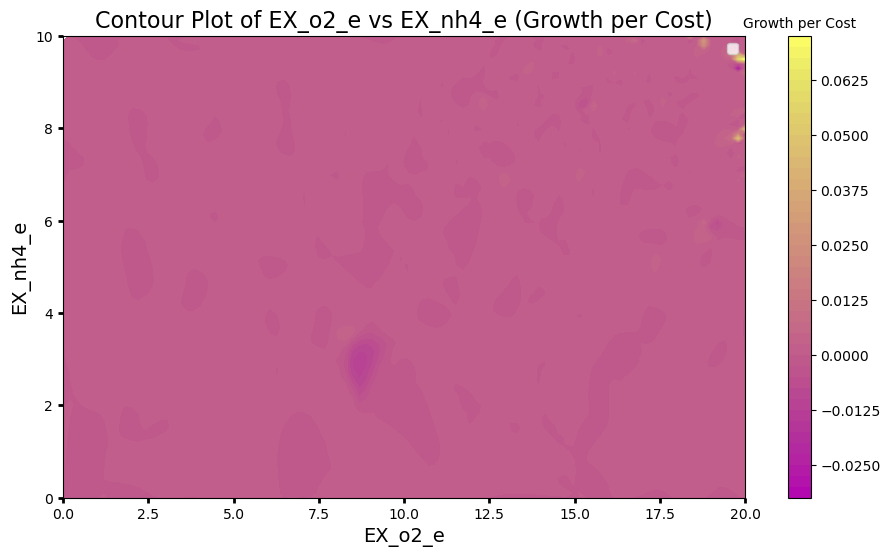

In [102]:
# Figure 2C
plot_contour(
    results_iML1515_M9,
    results_BO = None,
    var_1 = "EX_o2_e",
    var_2 = "EX_nh4_e",
    var_Z = "Growth per Cost",
    levels = 40,
    figname = "figname"
)

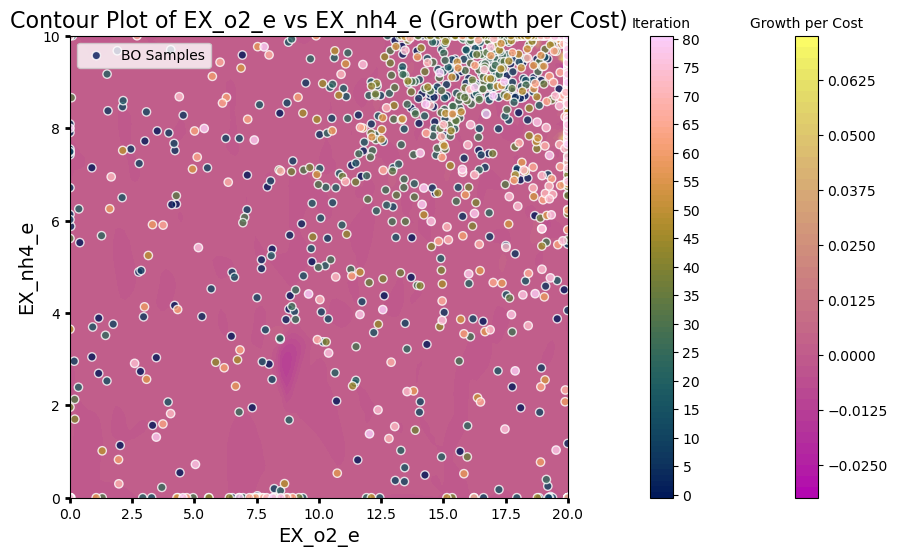

In [103]:
# Figure 2C
plot_contour(
    results_iML1515_M9,
    results_BO = results_iML1515_M9,
    var_1 = "EX_o2_e",
    var_2 = "EX_nh4_e",
    var_Z = "Growth per Cost",
    levels = 40,
    figname = "figname"
)